Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9475 - loss: 0.1701 - val_accuracy: 0.9843 - val_loss: 0.0557
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9841 - loss: 0.0509 - val_accuracy: 0.9890 - val_loss: 0.0441
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9892 - loss: 0.0363 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.9883 - val_loss: 0.0376
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9930 - loss: 0.0206 - val_accuracy: 0.9878 - val_loss: 0.0453
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9917 - val_loss: 0.0328
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9907 - val_loss: 0.0412
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9966 - loss: 0.0107 - 

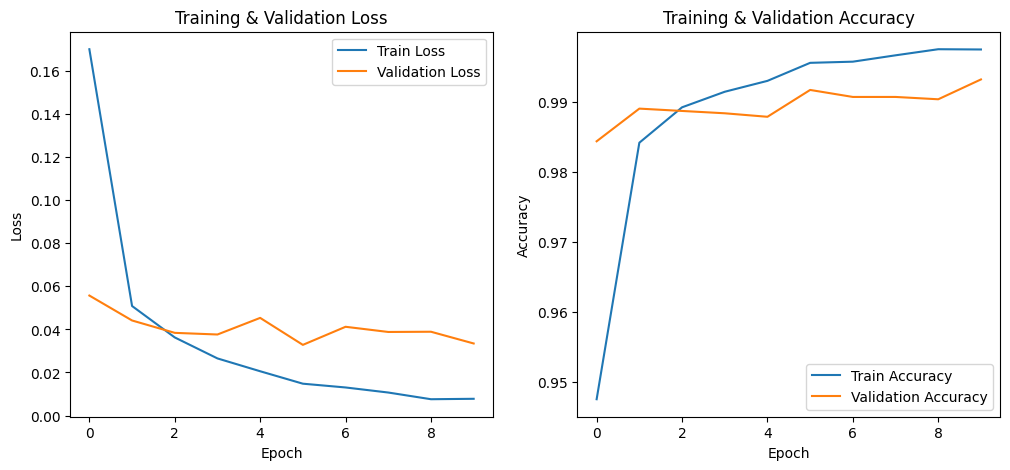

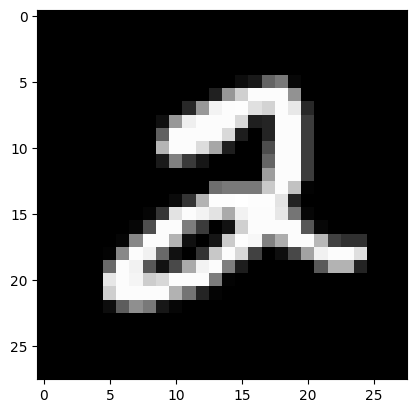

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

train_path = "/Users/akshay/Downloads/demo_dl/datasets1/MNIST(Ass2&3)/mnist_train.csv"
test_path  = "/Users/akshay/Downloads/demo_dl/datasets1/MNIST(Ass2&3)/mnist_test.csv"

# Load CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Split labels and pixels
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)


model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)



test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()




img = x_train[5].reshape(28, 28)
plt.imshow(img, cmap="gray")
plt.show()


#Implement the Image classification CNN model for classifying hand-written
#MNIST dataset by dividing the model into following 4 stages:
#a. Loading and preprocessing the image data
#b. Defining the model's architecture
#. Training the model
#d. Estimating the model's performance
